In [1]:
import numpy as np
import random
import read_map as rm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
map_test = rm.map_read('maps/corridor.png')
map_arr = np.asarray(map_test)

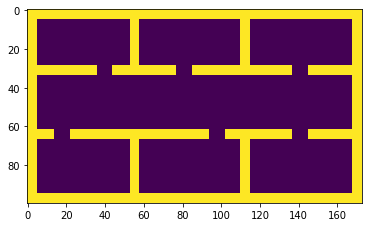

In [4]:
plt.imshow(map_test)

In [5]:
map_arr = np.asarray(map_test)

In [6]:
map_arr.shape[1]

173

In [7]:
def move_bot(direction,position,map_arr,move_prob,reward_dict):
    
    hit_wall = reward_dict['hit_wall']
    movement = reward_dict['movement']
    reward = movement
    
    if direction == 0:
        if map_arr[position[0]-1,position[1]] == 0:
            position[0] -= 1
            
        else:
            reward += hit_wall
        
    if direction == 1:
        if map_arr[position[0],position[1]+1] == 0:
            position[1] += 1
        
        else:
            reward += hit_wall
        
        
    if direction == 2:
        if map_arr[position[0]+1,position[1]] == 0:
            position[0] += 1
        else:
            reward +=  hit_wall    
            
    if direction == 3:
        if map_arr[position[0],position[1]-1] == 0:
            position[1] -= 1
        else:
            reward += hit_wall
        
    return position, reward


In [8]:
def init_available_moves(map_arr):
    available_moves = [0,1,2,3,4]
    i_row = map_arr.shape[0]
    i_col = map_arr.shape[1]
    possible_movement_array = np.empty(map_arr.shape, dtype='object')
    
    for n_row in range(i_row):
        for n_col in range(i_col):
            if map_arr[n_row][n_col] == 0:
                possible_movement_array[n_row][n_col] = available_moves
    
    return possible_movement_array
                
                
            

In [9]:
def choose_move(possible_movement_array, position):
    return random.choice(possible_movement_array[position[0],position[1]])

In [10]:
def calculate_reward(map_arr,reward_dict,move_prob, goal_position, previous_values = 'empty',extra_val = -1000):
    wrong_direc = move_prob
    movement = reward_dict['movement']
    if previous_values == 'empty':
        previous_values = create_zero_initial_values(map_arr,extra_val)
    new_values = np.copy(previous_values).tolist()
    i_row = map_arr.shape[0]
    i_col = map_arr.shape[1]
    for n_row in range(i_row):
        for n_col in range(i_col):
            current_val = 0
            
            if previous_values[n_row][n_col] != extra_val:
                current_val = previous_values[n_row][n_col] + movement
                #can add more in here for checking more areas
                for position in [[n_row,n_col]]:
                    if map_arr[position[0]][position[1]] == 0:
                        
                        current_val += reward_on_spot(position,map_arr,reward_dict,goal_position,move_prob,previous_values)
                new_values[n_row][n_col] = current_val
                
            
    return new_values
           
            
            
                
                    
                    
    

In [11]:
def create_zero_initial_values(map_arr,extra_val):
    i_row = map_arr.shape[0]
    i_col = map_arr.shape[1]
    initial_values_array = np.empty(map_arr.shape, dtype='float')
    for n_row in range(i_row):
        for n_col in range(i_col):
            if map_arr[n_row][n_col] == 0:
                initial_values_array[n_row][n_col] = 0
            else:
                initial_values_array[n_row][n_col] = extra_val
    return initial_values_array
    

In [12]:
def reward_on_spot(position,map_arr,reward_dict,goal_position,move_prob,previous_plan):
    hit_wall = reward_dict['hit_wall']
    reached_goal = reward_dict['reached_goal']
    n_row = position[0]
    n_col = position[1]
    move_prob
    current_val = 0
    surrounding_cell = 0
    #check up
    if map_arr[n_row-1][n_col] == 1:
        current_val += hit_wall*move_prob
    elif map_arr[n_row-1][n_col] == 0:
        current_val += previous_plan[n_row-1][n_col]*move_prob
        surrounding_cell += 1
        
    #check down
    if map_arr[n_row+1][n_col] == 1:
        current_val += hit_wall*move_prob
    elif map_arr[n_row+1][n_col] == 0:
        current_val += previous_plan[n_row+1][n_col]*move_prob
        surrounding_cell += 1
        
    #check left
    if map_arr[n_row][n_col-1] == 1:
        current_val += hit_wall*move_prob
    elif map_arr[n_row][n_col-1] == 0:
        current_val += previous_plan[n_row][n_col-1]*move_prob
        surrounding_cell += 1
        
    #check right
    
    if map_arr[n_row][n_col+1] == 1:
        current_val += hit_wall*move_prob
    elif map_arr[n_row][n_col+1] == 0:
        current_val += previous_plan[n_row][n_col+1]*move_prob
        surrounding_cell += 1

    #goal
    if [n_row-1,n_col] == goal_position or [n_row+1,n_col] == goal_position or [n_row,n_col-1] == goal_position or [n_row,n_col+1] == goal_position:
        current_val += reached_goal*move_prob
    elif [n_row,n_col] == goal_position:
        current_val += reached_goal
    current_val = current_val/surrounding_cell    
    return current_val
    
    

In [13]:
def choose_route(map_arr,plan,start_spot,terminal_states):
    at_terminal = False
    position = start_spot
    row_number = map_arr.shape[0]
    col_number = map_arr.shape[1]
    route = [position]
    while at_terminal == False:
        surrounding = [[position[0]-1,position[1]], [position[0]+1,position[1]], [position[0],position[1]-1], [position[0],position[1]+1]]
        for i in range(len(surrounding)-1,-1,-1):
            if surrounding[i][0] == row_number or surrounding[i][1] == col_number or surrounding[i][0] == 0 or surrounding[i][1] == 0 or map_arr[surrounding[i][0]][surrounding[i][1]] != 0 or surrounding[i] in route:
                surrounding.pop(i)
        weight_list = []
        for i_poss in surrounding:
            weight_list.append(plan[i_poss[0]][i_poss[1]])
        
        
        route.append(surrounding[weight_list.index(max(weight_list))])
        position = route[-1]
        print(position)
        
        
        if route[-1] in terminal_states:
            at_terminal = True
        
    return route

In [14]:
def choose_route_look_ahead(map_arr,plan,start_spot,terminal_states):
    at_terminal = False
    position = start_spot
    row_number = map_arr.shape[0]
    col_number = map_arr.shape[1]
    route = [position]
    while at_terminal == False:
        surrounding = [[position[0]-1,position[1]], [position[0]+1,position[1]], [position[0],position[1]-1], [position[0],position[1]+1]]
        for i in range(len(surrounding)-1,-1,-1):
            if surrounding[i][0] == row_number or surrounding[i][1] == col_number or surrounding[i][0] == 0 or surrounding[i][1] == 0 or map_arr[surrounding[i][0]][surrounding[i][1]] != 0 or surrounding[i] in route:
                surrounding.pop(i)
        weight_list = []
        surr_len = len(surrounding)
        for i_poss in surrounding:
            weight_list.append(plan[i_poss[0]][i_poss[1]])
            for pos_iter in [[i_poss[0]-1,i_poss[1]],[i_poss[0]+1,i_poss[1]],[i_poss[0],i_poss[1]-1],[i_poss[0],i_poss[1]+1]]:
                if map_arr[pos_iter[0],pos_iter[1]] == 0:
                    weight_list[len(weight_list)-1] += plan[pos_iter[0]][pos_iter[1]]
                    
        try:   
            route.append(surrounding[weight_list.index(max(weight_list))])
        except:
            print(route)
            print('bad path')
            return route
        position = route[-1]
        
        
        
        if route[-1] in terminal_states:
            print(route)
            at_terminal = True
            
        
    return route

In [15]:
def find_rooms_and_doors(map_arr):
    row_number = map_arr.shape[0]
    col_number = map_arr.shape[1]
    i = 0
    room_list = []
    for i_row in range(0,row_number-1):
        for i_col in range(0,col_number-1):
            if map_arr[i_row][i_col] == 1 and map_arr[i_row+1][i_col] == 1 and map_arr[i_row][i_col+1] == 1 and map_arr[i_row+1][i_col+1] == 0:
                top_corner = [i_row,i_col]
                r_row = i_row+1
                r_col = i_col+1
                while map_arr[r_row+1][r_col] != 1:
                    r_row += 1
                while map_arr[r_row][r_col+1] != 1:
                    r_col+=1
                bottom_corner = [r_row+1,r_col+1]
                
                room_list.append([top_corner,bottom_corner])
    ver_doors = []
    hor_doors = []            
    for room in room_list:
        room_height = room[1][0] - room[0][0]
        room_width = room[1][1] - room[0][1]
        #check top and bottom
        sides = -1
        
        for v_side in range(0,2):
            found_door = False
            wall = room[v_side][0] + sides
            for room_col in range(0,room_width):
                
                other_wall = room_col + room[0][1]
                
                
                if found_door == False and map_arr[wall, other_wall] == 0:
                    found_door = True
                    door_start = [wall, other_wall]
                    
                if found_door == True and map_arr[wall, other_wall] == 1:
                    door_end = [wall, other_wall -1]
                    hor_doors.append([door_start,door_end,room])
                    found_door = False
                    #print(room_width)
                    door_start= None 
                    door_end = None
                    #print(map_arr[wall, room_col])
                    #print(hor_doors)
                
            sides = 1
        
    
    
    return room_list, hor_doors

In [16]:
def create_room_arr(room_list,hor_doors,map_arr):
    rooms = []
    room_num = 0
    for room in room_list:
        rooms.append(Room(room,room_list,hor_doors,map_arr,room_num))
        room_num += 1
    return rooms

In [17]:
class Room():
    def __init__(self,room,room_list,doors,map_arr,room_num):
        self.room = room
        self.global_doors = doors
        self.map_arr = map_arr
        self.room_num = room_num
        self.room_list = room_list
        self.goal = None
        self.room_map()
        self.find_connections()
        self.find_goals()
        self.ASP_connections()
        
        
        
    def room_map(self):
        self.roombox = np.copy(self.map_arr[self.room[0][0]:self.room[1][0]+1,self.room[0][1]:self.room[1][1]+1])
        self.roombox = np.pad(self.roombox, [(1, 1), (1, 1)], mode='constant', constant_values=1)

    def find_connections(self):
        diff_doors = []
        same_doors = []
        for door in self.global_doors:
            if door[2] != self.room:
                diff_doors.append(door)
            else:
                same_doors.append(door)
                
        self.connections = []
        for same in same_doors:
            for diff in diff_doors:
                if (abs(same[0][0]-diff[0][0]) < 10) and same[0][1] == diff[0][1]:
                    self.connections.append([diff[2],same[0:2]])
    
    def find_goals(self):
        self.local_doors = []
        for door in self.global_doors:
            if door[2] == self.room:
                loc_door_x1 = door[0][0]-door[2][0][0]
                loc_door_x2 = door[1][0]-door[2][0][0]
                loc_door_y1 = door[0][1]-door[2][0][1]
                loc_door_y2 = door[1][1]-door[2][0][1]
                self.local_doors.append([[loc_door_x1,loc_door_y1],[loc_door_x2,loc_door_y2], door])
        
        self.goals = []
        for loc_door in self.local_doors:
            goal_x = loc_door[0][0] + int((loc_door[1][0]-loc_door[0][0])/2)
            goal_y = loc_door[0][1] + int((loc_door[1][1]-loc_door[0][1])/2)
            self.goals.append([goal_x,goal_y])  
    
    def ASP_connections(self):
        self.ASP_connect = []
        for connect in self.connections:
            val = self.room_list.index(connect[0])
            self.ASP_connect.append(f'holds(adjacent({self.room_num}, {val}),0).')
                

In [18]:
def create_asp(room_obj_list):
    asp_list = []
    for room in room_obj_list:
        for bap in room.ASP_connect:
            asp_list.append(bap)
    return asp_list

In [19]:
e, c = find_rooms_and_doors(map_arr)
a = create_room_arr(e,c,map_arr)
asp = create_asp(a)



In [20]:
a[0].connections

[[[[33, 4], [62, 168]], [[30, 36], [30, 43]]]]

In [21]:
a[3].ASP_connect

['holds(adjacent(3, 0),0).',
 'holds(adjacent(3, 1),0).',
 'holds(adjacent(3, 2),0).',
 'holds(adjacent(3, 4),0).',
 'holds(adjacent(3, 5),0).',
 'holds(adjacent(3, 6),0).']

In [30]:
a[3].local_doors

[[[-1, 32], [-1, 39], [[32, 36], [32, 43], [[33, 4], [62, 168]]]],
 [[-1, 73], [-1, 80], [[32, 77], [32, 84], [[33, 4], [62, 168]]]],
 [[-1, 133], [-1, 140], [[32, 137], [32, 144], [[33, 4], [62, 168]]]],
 [[30, 10], [30, 17], [[63, 14], [63, 21], [[33, 4], [62, 168]]]],
 [[30, 90], [30, 97], [[63, 94], [63, 101], [[33, 4], [62, 168]]]],
 [[30, 133], [30, 140], [[63, 137], [63, 144], [[33, 4], [62, 168]]]]]

In [31]:
a[3].room

[[33, 4], [62, 168]]

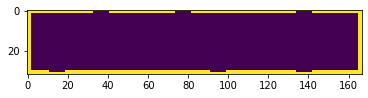

In [33]:
plt.imshow(a[3].roombox)

In [34]:
map_test = rm.map_read('corridor.png')
map_arr = np.asarray(map_test)
map_arr

FileNotFoundError: [Errno 2] No such file or directory: 'corridor.png'

In [35]:
reward_dict = {'hit_wall':-10,'movement':-10,'reached_goal':100}
move_prob = 1
goal_position = [6,6]
testme = calculate_reward(a[0],reward_dict,move_prob, a[0].goals[0])
for i in range(0,100):
    testme = calculate_reward(a[0],reward_dict,move_prob, a[0].goals[0], testme)


AttributeError: 'Room' object has no attribute 'shape'

NameError: name 'testme' is not defined

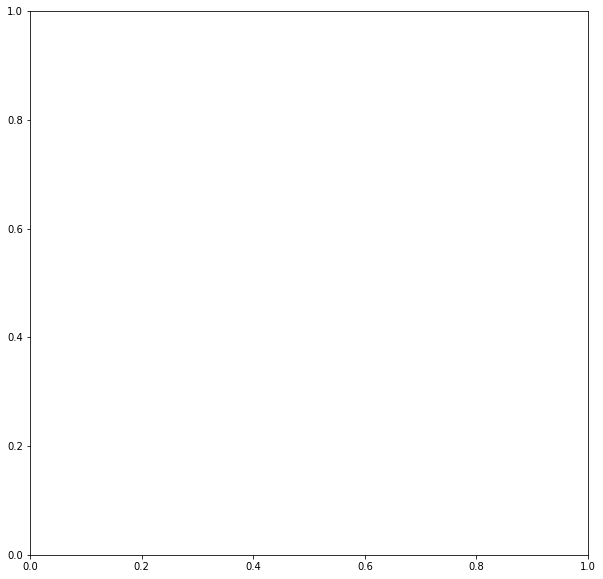

In [36]:
fig= plt.subplots(figsize=(10,10))
fig = plt.imshow(testme)

In [37]:
route2 = [[10, 10], [10, 11], [11, 11], [11, 12], [12, 12], [12, 13], [13, 13], [13, 14], [14, 14], [14, 15], [15, 15], [15, 16], [16, 16], [16, 17], [16, 18], [17, 18], [17, 19], [17, 20], [17, 21], [17, 22], [17, 23], [17, 24], [17, 25], [17, 26], [17, 27], [17, 28], [17, 29], [18, 29], [18, 30], [18, 31], [18, 32], [18, 33], [18, 34], [18, 35], [18, 36], [17, 36], [17, 35], [17, 34], [17, 33], [17, 32], [17, 31], [17, 30], [16, 30], [16, 31], [16, 32], [16, 33], [16, 34], [16, 35], [16, 36], [16, 37], [17, 37], [18, 37], [18, 38], [17, 38], [17, 39], [18, 39], [18, 40], [17, 40], [17, 41], [18, 41], [19, 41], [19, 40], [19, 39], [19, 38], [19, 37], [19, 36], [19, 35], [19, 34], [19, 33], [19, 32], [19, 31], [19, 30], [19, 29], [19, 28], [18, 28], [18, 27], [18, 26], [18, 25], [18, 24], [18, 23], [18, 22], [18, 21], [18, 20], [18, 19], [18, 18], [19, 18], [19, 19], [19, 20], [19, 21], [19, 22], [19, 23], [19, 24], [19, 25], [19, 26], [19, 27], [20, 27], [20, 28], [20, 29], [20, 30], [20, 31], [20, 32], [20, 33], [20, 34], [20, 35], [20, 36], [20, 37], [20, 38], [20, 39], [20, 40], [20, 41], [20, 42], [19, 42], [18, 42], [17, 42], [16, 42], [16, 41], [16, 40], [16, 39], [16, 38], [15, 38], [15, 37], [15, 36], [15, 35], [15, 34], [15, 33], [15, 32], [15, 31], [15, 30], [15, 29], [16, 29], [16, 28], [16, 27], [16, 26], [16, 25], [16, 24], [16, 23], [16, 22], [16, 21], [16, 20], [16, 19], [15, 19], [15, 20], [15, 21], [15, 22], [15, 23], [15, 24], [15, 25], [15, 26], [15, 27], [15, 28], [14, 28], [14, 29], [14, 30], [14, 31], [14, 32], [14, 33], [14, 34], [14, 35], [14, 36], [14, 37], [14, 38], [14, 39], [15, 39], [15, 40], [15, 41], [15, 42], [15, 43], [16, 43], [17, 43], [18, 43], [19, 43], [20, 43], [20, 44], [19, 44], [18, 44], [17, 44], [16, 44], [15, 44], [14, 44], [14, 43], [14, 42], [14, 41], [14, 40], [13, 40], [13, 39], [13, 38], [13, 37], [13, 36], [13, 35], [13, 34], [13, 33], [13, 32], [13, 31], [13, 30], [13, 29], [13, 28], [13, 27], [14, 27], [14, 26], [14, 25], [14, 24], [14, 23], [14, 22], [14, 21], [14, 20], [14, 19], [14, 18], [15, 18], [15, 17], [14, 17], [14, 16], [13, 16], [13, 17], [13, 18], [13, 19], [13, 20], [13, 21], [13, 22], [13, 23], [13, 24], [13, 25], [13, 26], [12, 26], [12, 27], [12, 28], [12, 29], [12, 30], [12, 31], [12, 32], [12, 33], [12, 34], [12, 35], [12, 36], [12, 37], [12, 38], [12, 39], [12, 40], [12, 41], [13, 41], [13, 42], [13, 43], [13, 44], [13, 45], [14, 45], [15, 45], [16, 45], [17, 45], [18, 45], [19, 45], [20, 45], [21, 45], [21, 44], [21, 43], [21, 42], [21, 41], [21, 40], [21, 39], [21, 38], [21, 37], [21, 36], [21, 35], [21, 34], [21, 33], [21, 32], [21, 31], [21, 30], [21, 29], [21, 28], [21, 27], [21, 26], [20, 26], [20, 25], [20, 24], [20, 23], [20, 22], [20, 21], [20, 20], [20, 19], [20, 18], [20, 17], [19, 17], [18, 17], [17, 17], [17, 16], [18, 16], [19, 16], [20, 16], [20, 15], [19, 15], [18, 15], [17, 15], [16, 15], [16, 14], [17, 14], [18, 14], [19, 14], [20, 14], [21, 14], [21, 15], [21, 16], [21, 17], [21, 18], [21, 19], [21, 20], [21, 21], [21, 22], [21, 23], [21, 24], [21, 25], [22, 25], [22, 26], [22, 27], [22, 28], [22, 29], [22, 30], [22, 31], [22, 32], [22, 33], [22, 34], [22, 35], [22, 36], [22, 37], [22, 38], [22, 39], [22, 40], [22, 41], [22, 42], [22, 43], [22, 44], [22, 45], [22, 46], [21, 46], [20, 46], [19, 46], [18, 46], [17, 46], [16, 46], [15, 46], [14, 46], [13, 46], [12, 46], [12, 45], [12, 44], [12, 43], [12, 42], [11, 42], [11, 41], [11, 40], [11, 39], [11, 38], [11, 37], [11, 36], [11, 35], [11, 34], [11, 33], [11, 32], [11, 31], [11, 30], [11, 29], [11, 28], [11, 27], [11, 26], [11, 25], [12, 25], [12, 24], [12, 23], [12, 22], [12, 21], [12, 20], [12, 19], [12, 18], [12, 17], [12, 16], [12, 15], [13, 15], [34, 41], [34, 42], [34, 43], [34, 44], [35, 44], [35, 45], [35, 46], [35, 47], [35, 48], [35, 49], [35, 50], [35, 51], [35, 52], [35, 53], [35, 54], [35, 55], [35, 56], [35, 57], [35, 58], [35, 59], [35, 60], [35, 61], [35, 62], [35, 63], [35, 64], [35, 65], [35, 66], [35, 67], [35, 68], [35, 69], [35, 70], [35, 71], [35, 72], [35, 73], [35, 74], [35, 75], [35, 76], [35, 77], [36, 77], [37, 77], [38, 77], [39, 77], [40, 77], [41, 77], [42, 77], [43, 77], [44, 77], [45, 77], [46, 77], [47, 77], [48, 77], [48, 78], [48, 79], [48, 80], [48, 81], [48, 82], [48, 83], [48, 84], [48, 85], [48, 86], [48, 87], [48, 88], [48, 89], [48, 90], [49, 90], [49, 91], [49, 92], [49, 93], [49, 94], [49, 95], [49, 96], [49, 97], [49, 98], [49, 99], [49, 100], [49, 101], [49, 102], [49, 103], [49, 104], [49, 105], [49, 106], [49, 107], [49, 108], [49, 109], [49, 110], [49, 111], [49, 112], [49, 113], [49, 114], [48, 114], [48, 113], [48, 112], [48, 111], [48, 110], [48, 109], [48, 108], [48, 107], [48, 106], [48, 105], [48, 104], [48, 103], [48, 102], [48, 101], [48, 100], [48, 99], [48, 98], [48, 97], [48, 96], [48, 95], [48, 94], [48, 93], [48, 92], [48, 91], [47, 91], [47, 90], [47, 89], [47, 88], [47, 87], [47, 86], [47, 85], [47, 84], [47, 83], [47, 82], [47, 81], [47, 80], [47, 79], [47, 78], [46, 78], [46, 79], [46, 80], [46, 81], [46, 82], [46, 83], [46, 84], [46, 85], [46, 86], [46, 87], [46, 88], [46, 89], [46, 90], [46, 91], [46, 92], [47, 92], [47, 93], [47, 94], [47, 95], [47, 96], [47, 97], [47, 98], [47, 99], [47, 100], [47, 101], [47, 102], [47, 103], [47, 104], [47, 105], [47, 106], [47, 107], [47, 108], [47, 109], [47, 110], [47, 111], [47, 112], [47, 113], [47, 114], [47, 115], [48, 115], [49, 115], [49, 116], [48, 116], [48, 117], [49, 117], [49, 118], [49, 119], [49, 120], [49, 121], [49, 122], [49, 123], [49, 124], [49, 125], [49, 126], [49, 127], [49, 128], [49, 129], [49, 130], [49, 131], [49, 132], [49, 133], [49, 134], [49, 135], [49, 136], [49, 137], [49, 138], [49, 139], [49, 140], [49, 141], [48, 141], [48, 142], [49, 142], [49, 143], [48, 143], [48, 144], [49, 144], [49, 145], [48, 145], [48, 146], [49, 146], [49, 147], [48, 147], [48, 148], [49, 148], [49, 149], [48, 149], [48, 150], [49, 150], [49, 151], [48, 151], [48, 152], [49, 152], [49, 153], [48, 153], [48, 154], [49, 154], [50, 154], [50, 153], [50, 152], [50, 151], [50, 150], [50, 149], [50, 148], [50, 147], [50, 146], [50, 145], [50, 144], [50, 143], [50, 142], [50, 141], [50, 140], [50, 139], [50, 138], [50, 137], [50, 136], [50, 135], [50, 134], [50, 133], [50, 132], [50, 131], [50, 130], [50, 129], [50, 128], [50, 127], [50, 126], [50, 125], [50, 124], [50, 123], [50, 122], [50, 121], [50, 120], [50, 119], [50, 118], [50, 117], [50, 116], [50, 115], [50, 114], [50, 113], [50, 112], [50, 111], [50, 110], [50, 109], [50, 108], [50, 107], [50, 106], [50, 105], [50, 104], [50, 103], [50, 102], [50, 101], [50, 100], [50, 99], [50, 98], [50, 97], [50, 96], [50, 95], [50, 94], [50, 93], [50, 92], [50, 91], [50, 90], [50, 89], [49, 89], [49, 88], [49, 87], [49, 86], [49, 85], [49, 84], [49, 83], [49, 82], [49, 81], [49, 80], [49, 79], [49, 78], [49, 77], [49, 76], [48, 76], [48, 75], [48, 74], [48, 73], [48, 72], [48, 71], [48, 70], [48, 69], [48, 68], [48, 67], [48, 66], [48, 65], [49, 65], [49, 66], [49, 67], [49, 68], [49, 69], [49, 70], [49, 71], [49, 72], [49, 73], [49, 74], [49, 75], [50, 75], [50, 76], [50, 77], [50, 78], [50, 79], [50, 80], [50, 81], [50, 82], [50, 83], [50, 84], [50, 85], [50, 86], [50, 87], [50, 88], [51, 88], [51, 89], [51, 90], [51, 91], [51, 92], [51, 93], [51, 94], [51, 95], [51, 96], [51, 97], [51, 98], [51, 99], [51, 100], [51, 101], [51, 102], [51, 103], [51, 104], [51, 105], [51, 106], [51, 107], [51, 108], [51, 109], [51, 110], [51, 111], [51, 112], [51, 113], [51, 114], [51, 115], [51, 116], [51, 117], [51, 118], [51, 119], [51, 120], [51, 121], [51, 122], [51, 123], [51, 124], [51, 125], [51, 126], [51, 127], [51, 128], [51, 129], [51, 130], [51, 131], [51, 132], [51, 133], [51, 134], [51, 135], [51, 136], [51, 137], [51, 138], [51, 139], [51, 140], [51, 141], [51, 142], [51, 143], [51, 144], [51, 145], [51, 146], [51, 147], [51, 148], [51, 149], [51, 150], [51, 151], [51, 152], [51, 153], [51, 154], [51, 155], [50, 155], [49, 155], [48, 155], [47, 155], [47, 154], [47, 153], [47, 152], [47, 151], [47, 150], [47, 149], [47, 148], [47, 147], [47, 146], [47, 145], [47, 144], [47, 143], [47, 142], [47, 141], [47, 140], [48, 140], [48, 139], [48, 138], [48, 137], [48, 136], [48, 135], [48, 134], [48, 133], [48, 132], [48, 131], [48, 130], [48, 129], [48, 128], [48, 127], [48, 126], [48, 125], [48, 124], [48, 123], [48, 122], [48, 121], [48, 120], [48, 119], [48, 118], [47, 118], [47, 117], [47, 116], [46, 116], [46, 115], [46, 114], [46, 113], [46, 112], [46, 111], [46, 110], [46, 109], [46, 108], [46, 107], [46, 106], [46, 105], [46, 104], [46, 103], [46, 102], [46, 101], [46, 100], [46, 99], [46, 98], [46, 97], [46, 96], [46, 95], [46, 94], [46, 93], [45, 93], [45, 92], [45, 91], [45, 90], [45, 89], [45, 88], [45, 87], [45, 86], [45, 85], [45, 84], [45, 83], [45, 82], [45, 81], [45, 80], [45, 79], [45, 78], [44, 78], [44, 79], [44, 80], [44, 81], [44, 82], [44, 83], [44, 84], [44, 85], [44, 86], [44, 87], [44, 88], [44, 89], [44, 90], [44, 91], [44, 92], [44, 93], [44, 94], [45, 94], [45, 95], [45, 96], [45, 97], [45, 98], [45, 99], [45, 100], [45, 101], [45, 102], [45, 103], [45, 104], [45, 105], [45, 106], [45, 107], [45, 108], [45, 109], [45, 110], [45, 111], [45, 112], [45, 113], [45, 114], [45, 115], [45, 116], [45, 117], [46, 117], [46, 118], [46, 119], [47, 119], [47, 120], [47, 121], [47, 122], [47, 123], [47, 124], [47, 125], [47, 126], [47, 127], [47, 128], [47, 129], [47, 130], [47, 131], [47, 132], [47, 133], [47, 134], [47, 135], [47, 136], [47, 137], [47, 138], [47, 139], [46, 139], [46, 140], [46, 141], [46, 142], [46, 143], [46, 144], [46, 145], [46, 146], [46, 147], [46, 148], [46, 149], [46, 150], [46, 151], [46, 152], [46, 153], [46, 154], [46, 155], [46, 156], [47, 156], [48, 156], [49, 156], [50, 156], [51, 156], [51, 157], [50, 157], [49, 157], [48, 157], [47, 157], [46, 157], [45, 157], [45, 156], [45, 155], [45, 154], [45, 153], [45, 152], [45, 151], [45, 150], [45, 149], [45, 148], [45, 147], [45, 146], [45, 145], [45, 144], [45, 143], [45, 142], [45, 141], [45, 140], [45, 139], [45, 138], [46, 138], [46, 137], [46, 136], [46, 135], [46, 134], [46, 133], [46, 132], [46, 131], [46, 130], [46, 129], [46, 128], [46, 127], [46, 126], [46, 125], [46, 124], [46, 123], [46, 122], [46, 121], [46, 120], [45, 120], [45, 121], [45, 122], [45, 123], [45, 124], [45, 125], [45, 126], [45, 127], [45, 128], [45, 129], [45, 130], [45, 131], [45, 132], [45, 133], [45, 134], [45, 135], [45, 136], [45, 137], [44, 137], [44, 138], [44, 139], [44, 140], [44, 141], [44, 142], [44, 143], [44, 144], [44, 145], [44, 146], [44, 147], [44, 148], [44, 149], [44, 150], [44, 151], [44, 152], [44, 153], [44, 154], [44, 155], [44, 156], [44, 157], [44, 158], [45, 158], [46, 158], [47, 158], [48, 158], [49, 158], [50, 158], [51, 158], [52, 158], [52, 157], [52, 156], [52, 155], [52, 154], [52, 153], [52, 152], [52, 151], [52, 150], [52, 149], [52, 148], [52, 147], [52, 146], [52, 145], [52, 144], [52, 143], [52, 142], [52, 141], [52, 140], [52, 139], [52, 138], [52, 137], [52, 136], [52, 135], [52, 134], [52, 133], [52, 132], [52, 131], [52, 130], [52, 129], [52, 128], [52, 127], [52, 126], [52, 125], [52, 124], [52, 123], [52, 122], [52, 121], [52, 120], [52, 119], [52, 118], [52, 117], [52, 116], [52, 115], [52, 114], [52, 113], [52, 112], [52, 111], [52, 110], [52, 109], [52, 108], [52, 107], [52, 106], [52, 105], [52, 104], [52, 103], [52, 102], [52, 101], [52, 100], [52, 99], [52, 98], [52, 97], [52, 96], [52, 95], [52, 94], [52, 93], [52, 92], [52, 91], [52, 90], [52, 89], [52, 88], [52, 87], [51, 87], [51, 86], [51, 85], [51, 84], [51, 83], [51, 82], [51, 81], [51, 80], [51, 79], [51, 78], [51, 77], [51, 76], [51, 75], [51, 74], [50, 74], [50, 73], [50, 72], [50, 71], [50, 70], [50, 69], [50, 68], [50, 67], [50, 66], [50, 65], [50, 64], [49, 64], [48, 64], [48, 63], [48, 62], [48, 61], [48, 60], [48, 59], [48, 58], [48, 57], [48, 56], [48, 55], [48, 54], [48, 53], [48, 52], [48, 51], [48, 50], [48, 49], [48, 48], [48, 47], [48, 46], [48, 45], [48, 44], [48, 43], [48, 42], [48, 41], [48, 40], [48, 39], [48, 38], [48, 37], [48, 36], [48, 35], [48, 34], [48, 33], [48, 32], [48, 31], [48, 30], [49, 30], [49, 29], [49, 28], [49, 27], [49, 26], [49, 25], [49, 24], [48, 24], [48, 25], [48, 26], [48, 27], [48, 28], [48, 29], [47, 29], [47, 30], [47, 31], [47, 32], [47, 33], [47, 34], [47, 35], [47, 36], [47, 37], [47, 38], [47, 39], [47, 40], [47, 41], [47, 42], [47, 43], [47, 44], [47, 45], [47, 46], [47, 47], [47, 48], [47, 49], [47, 50], [47, 51], [47, 52], [47, 53], [47, 54], [47, 55], [47, 56], [47, 57], [47, 58], [47, 59], [47, 60], [47, 61], [47, 62], [47, 63], [47, 64], [47, 65], [47, 66], [47, 67], [47, 68], [47, 69], [47, 70], [47, 71], [47, 72], [47, 73], [47, 74], [47, 75], [47, 76], [46, 76], [46, 75], [46, 74], [46, 73], [46, 72], [46, 71], [46, 70], [46, 69], [46, 68], [46, 67], [46, 66], [46, 65], [46, 64], [46, 63], [46, 62], [46, 61], [46, 60], [46, 59], [46, 58], [46, 57], [46, 56], [46, 55], [46, 54], [46, 53], [46, 52], [46, 51], [46, 50], [46, 49], [46, 48], [46, 47], [46, 46], [46, 45], [46, 44], [46, 43], [46, 42], [46, 41], [46, 40], [46, 39], [46, 38], [46, 37], [46, 36], [46, 35], [46, 34], [46, 33], [46, 32], [46, 31], [46, 30], [46, 29], [46, 28], [47, 28], [47, 27], [47, 26], [47, 25], [47, 24], [47, 23], [48, 23], [49, 23], [49, 22], [48, 22], [48, 21], [49, 21], [49, 20], [48, 20], [48, 19], [49, 19], [50, 19], [50, 20], [50, 21], [50, 22], [50, 23], [50, 24], [50, 25], [50, 26], [50, 27], [50, 28], [50, 29], [50, 30], [50, 31], [49, 31], [49, 32], [49, 33], [49, 34], [49, 35], [49, 36], [49, 37], [49, 38], [49, 39], [49, 40], [49, 41], [49, 42], [49, 43], [49, 44], [49, 45], [49, 46], [49, 47], [49, 48], [49, 49], [49, 50], [49, 51], [49, 52], [49, 53], [49, 54], [49, 55], [49, 56], [49, 57], [49, 58], [49, 59], [49, 60], [49, 61], [49, 62], [49, 63], [50, 63], [50, 62], [50, 61], [50, 60], [50, 59], [50, 58], [50, 57], [50, 56], [50, 55], [50, 54], [50, 53], [50, 52], [50, 51], [50, 50], [50, 49], [50, 48], [50, 47], [50, 46], [50, 45], [50, 44], [50, 43], [50, 42], [50, 41], [50, 40], [50, 39], [50, 38], [50, 37], [50, 36], [50, 35], [50, 34], [50, 33], [50, 32], [51, 32], [51, 31], [51, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [51, 23], [51, 22], [51, 21], [51, 20], [51, 19], [51, 18], [50, 18], [49, 18], [48, 18], [47, 18], [47, 19], [47, 20], [47, 21], [47, 22], [46, 22], [46, 23], [46, 24], [46, 25], [46, 26], [46, 27], [45, 27], [45, 28], [45, 29], [45, 30], [45, 31], [45, 32], [45, 33], [45, 34], [45, 35], [45, 36], [45, 37], [45, 38], [45, 39], [45, 40], [45, 41], [45, 42], [45, 43], [45, 44], [45, 45], [45, 46], [45, 47], [45, 48], [45, 49], [45, 50], [45, 51], [45, 52], [45, 53], [45, 54], [45, 55], [45, 56], [45, 57], [45, 58], [45, 59], [45, 60], [45, 61], [45, 62], [45, 63], [45, 64], [45, 65], [45, 66], [45, 67], [45, 68], [45, 69], [45, 70], [45, 71], [45, 72], [45, 73], [45, 74], [45, 75], [45, 76], [44, 76], [44, 75], [44, 74], [44, 73], [44, 72], [44, 71], [44, 70], [44, 69], [44, 68], [44, 67], [44, 66], [44, 65], [44, 64], [44, 63], [44, 62], [44, 61], [44, 60], [44, 59], [44, 58], [44, 57], [44, 56], [44, 55], [44, 54], [44, 53], [44, 52], [44, 51], [44, 50], [44, 49], [44, 48], [44, 47], [44, 46], [44, 45], [44, 44], [44, 43], [44, 42], [44, 41], [44, 40], [44, 39], [44, 38], [44, 37], [44, 36], [44, 35], [44, 34], [44, 33], [44, 32], [44, 31], [44, 30], [44, 29], [44, 28], [44, 27], [44, 26], [45, 26], [45, 25], [45, 24], [45, 23], [45, 22], [45, 21], [46, 21], [46, 20], [46, 19], [46, 18], [46, 17], [47, 17], [48, 17], [49, 17], [50, 17], [51, 17], [52, 17], [52, 18], [52, 19], [52, 20], [52, 21], [52, 22], [52, 23], [52, 24], [52, 25], [52, 26], [52, 27], [52, 28], [52, 29], [52, 30], [52, 31], [52, 32], [52, 33], [51, 33], [51, 34], [51, 35], [51, 36], [51, 37], [51, 38], [51, 39], [51, 40], [51, 41], [51, 42], [51, 43], [51, 44], [51, 45], [51, 46], [51, 47], [51, 48], [51, 49], [51, 50], [51, 51], [51, 52], [51, 53], [51, 54], [51, 55], [51, 56], [51, 57], [51, 58], [51, 59], [51, 60], [51, 61], [51, 62], [51, 63], [51, 64], [51, 65], [51, 66], [51, 67], [51, 68], [51, 69], [51, 70], [51, 71], [51, 72], [51, 73], [52, 73], [52, 74], [52, 75], [52, 76], [52, 77], [52, 78], [52, 79], [52, 80], [52, 81], [52, 82], [52, 83], [52, 84], [52, 85], [52, 86], [53, 86], [53, 87], [53, 88], [53, 89], [53, 90], [53, 91], [53, 92], [53, 93], [53, 94], [53, 95], [53, 96], [53, 97], [53, 98], [53, 99], [53, 100], [53, 101], [53, 102], [53, 103], [53, 104], [53, 105], [53, 106], [53, 107], [53, 108], [53, 109], [53, 110], [53, 111], [53, 112], [53, 113], [53, 114], [53, 115], [53, 116], [53, 117], [53, 118], [53, 119], [53, 120], [53, 121], [53, 122], [53, 123], [53, 124], [53, 125], [53, 126], [53, 127], [53, 128], [53, 129], [53, 130], [53, 131], [53, 132], [53, 133], [53, 134], [53, 135], [53, 136], [53, 137], [53, 138], [53, 139], [53, 140], [53, 141], [53, 142], [53, 143], [53, 144], [53, 145], [53, 146], [53, 147], [53, 148], [53, 149], [53, 150], [53, 151], [53, 152], [53, 153], [53, 154], [53, 155], [53, 156], [53, 157], [53, 158], [53, 159], [52, 159], [51, 159], [50, 159], [49, 159], [48, 159], [47, 159], [46, 159], [45, 159], [44, 159], [43, 159], [43, 158], [43, 157], [43, 156], [43, 155], [43, 154], [43, 153], [43, 152], [43, 151], [43, 150], [43, 149], [43, 148], [43, 147], [43, 146], [43, 145], [43, 144], [43, 143], [43, 142], [43, 141], [43, 140], [43, 139], [43, 138], [43, 137], [43, 136], [44, 136], [44, 135], [44, 134], [44, 133], [44, 132], [44, 131], [44, 130], [44, 129], [44, 128], [44, 127], [44, 126], [44, 125], [44, 124], [44, 123], [44, 122], [44, 121], [44, 120], [44, 119], [45, 119], [45, 118], [44, 118], [44, 117], [44, 116], [44, 115], [44, 114], [44, 113], [44, 112], [44, 111], [44, 110], [44, 109], [44, 108], [44, 107], [44, 106], [44, 105], [44, 104], [44, 103], [44, 102], [44, 101], [44, 100], [44, 99], [44, 98], [44, 97], [44, 96], [44, 95], [43, 95], [43, 94], [43, 93], [43, 92], [43, 91], [43, 90], [43, 89], [43, 88], [43, 87], [43, 86], [43, 85], [43, 84], [43, 83], [43, 82], [43, 81], [43, 80], [43, 79], [43, 78], [42, 78], [42, 79], [42, 80], [42, 81], [42, 82], [42, 83], [42, 84], [42, 85], [42, 86], [42, 87], [42, 88], [42, 89], [42, 90], [42, 91], [42, 92], [42, 93], [42, 94], [42, 95], [42, 96], [43, 96], [43, 97], [43, 98], [43, 99], [43, 100], [43, 101], [43, 102], [43, 103], [43, 104], [43, 105], [43, 106], [43, 107], [43, 108], [43, 109], [43, 110], [43, 111], [43, 112], [43, 113], [43, 114], [43, 115], [43, 116], [43, 117], [43, 118], [43, 119], [43, 120], [43, 121], [43, 122], [43, 123], [43, 124], [43, 125], [43, 126], [43, 127], [43, 128], [43, 129], [43, 130], [43, 131], [43, 132], [43, 133], [43, 134], [43, 135], [42, 135], [42, 136], [42, 137], [42, 138], [42, 139], [42, 140], [42, 141], [42, 142], [42, 143], [42, 144], [42, 145], [42, 146], [42, 147], [42, 148], [42, 149], [42, 150], [42, 151], [42, 152], [42, 153], [42, 154], [42, 155], [42, 156], [42, 157], [42, 158], [42, 159], [42, 160], [43, 160], [44, 160], [45, 160], [46, 160], [47, 160], [48, 160], [49, 160], [50, 160], [51, 160], [52, 160], [53, 160], [54, 160], [54, 159], [54, 158], [54, 157], [54, 156], [54, 155], [54, 154], [54, 153], [54, 152], [54, 151], [54, 150], [54, 149], [54, 148], [54, 147], [54, 146], [54, 145], [54, 144], [54, 143], [54, 142], [54, 141], [54, 140], [54, 139], [54, 138], [54, 137], [54, 136], [54, 135], [54, 134], [54, 133], [54, 132], [54, 131], [54, 130], [54, 129], [54, 128], [54, 127], [54, 126], [54, 125], [54, 124], [54, 123], [54, 122], [54, 121], [54, 120], [54, 119], [54, 118], [54, 117], [54, 116], [54, 115], [54, 114], [54, 113], [54, 112], [54, 111], [54, 110], [54, 109], [54, 108], [54, 107], [54, 106], [54, 105], [54, 104], [54, 103], [54, 102], [54, 101], [54, 100], [54, 99], [54, 98], [54, 97], [54, 96], [54, 95], [54, 94], [54, 93], [54, 92], [54, 91], [54, 90], [54, 89], [54, 88], [54, 87], [54, 86], [54, 85], [53, 85], [53, 84], [53, 83], [53, 82], [53, 81], [53, 80], [53, 79], [53, 78], [53, 77], [53, 76], [53, 75], [53, 74], [53, 73], [53, 72], [52, 72], [52, 71], [52, 70], [52, 69], [52, 68], [52, 67], [52, 66], [52, 65], [52, 64], [52, 63], [52, 62], [52, 61], [52, 60], [52, 59], [52, 58], [52, 57], [52, 56], [52, 55], [52, 54], [52, 53], [52, 52], [52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [53, 34], [53, 33], [53, 32], [53, 31], [53, 30], [53, 29], [53, 28], [53, 27], [53, 26], [53, 25], [53, 24], [53, 23], [53, 22], [53, 21], [53, 20], [53, 19], [53, 18], [53, 17], [53, 16], [52, 16], [51, 16], [50, 16], [49, 16], [48, 16], [47, 16], [46, 16], [45, 16], [45, 17], [45, 18], [45, 19], [45, 20], [44, 20], [44, 21], [44, 22], [44, 23], [44, 24], [44, 25], [43, 25], [43, 26], [43, 27], [43, 28], [43, 29], [43, 30], [43, 31], [43, 32], [43, 33], [43, 34], [43, 35], [43, 36], [43, 37], [43, 38], [43, 39], [43, 40], [43, 41], [43, 42], [43, 43], [43, 44], [43, 45], [43, 46], [43, 47], [43, 48], [43, 49], [43, 50], [43, 51], [43, 52], [43, 53], [43, 54], [43, 55], [43, 56], [43, 57], [43, 58], [43, 59], [43, 60], [43, 61], [43, 62], [43, 63], [43, 64], [43, 65], [43, 66], [43, 67], [43, 68], [43, 69], [43, 70], [43, 71], [43, 72], [43, 73], [43, 74], [43, 75], [43, 76], [42, 76], [42, 75], [42, 74], [42, 73], [42, 72], [42, 71], [42, 70], [42, 69], [42, 68], [42, 67], [42, 66], [42, 65], [42, 64], [42, 63], [42, 62], [42, 61], [42, 60], [42, 59], [42, 58], [42, 57], [42, 56], [42, 55], [42, 54], [42, 53], [42, 52], [42, 51], [42, 50], [42, 49], [42, 48], [42, 47], [42, 46], [42, 45], [42, 44], [42, 43], [42, 42], [42, 41], [42, 40], [42, 39], [42, 38], [42, 37], [42, 36], [42, 35], [42, 34], [42, 33], [42, 32], [42, 31], [42, 30], [42, 29], [42, 28], [42, 27], [42, 26], [42, 25], [42, 24], [43, 24], [43, 23], [43, 22], [43, 21], [43, 20], [43, 19], [44, 19], [44, 18], [44, 17], [44, 16], [44, 15], [45, 15], [46, 15], [47, 15], [48, 15], [49, 15], [50, 15], [51, 15], [52, 15], [53, 15], [54, 15], [54, 16], [54, 17], [54, 18], [54, 19], [54, 20], [54, 21], [54, 22], [54, 23], [54, 24], [54, 25], [54, 26], [54, 27], [54, 28], [54, 29], [54, 30], [54, 31], [54, 32], [54, 33], [54, 34], [54, 35], [53, 35], [53, 36], [53, 37], [53, 38], [53, 39], [53, 40], [53, 41], [53, 42], [53, 43], [53, 44], [53, 45], [53, 46], [53, 47], [53, 48], [53, 49], [53, 50], [53, 51], [53, 52], [53, 53], [53, 54], [53, 55], [53, 56], [53, 57], [53, 58], [53, 59], [53, 60], [53, 61], [53, 62], [53, 63], [53, 64], [53, 65], [53, 66], [53, 67], [53, 68], [53, 69], [53, 70], [53, 71], [54, 71], [54, 72], [54, 73], [54, 74], [54, 75], [54, 76], [54, 77], [54, 78], [54, 79], [54, 80], [54, 81], [54, 82], [54, 83], [54, 84], [55, 84], [55, 85], [55, 86], [55, 87], [55, 88], [55, 89], [55, 90], [55, 91], [55, 92], [55, 93], [55, 94], [55, 95], [55, 96], [55, 97], [55, 98], [55, 99], [55, 100], [55, 101], [55, 102], [55, 103], [55, 104], [55, 105], [55, 106], [55, 107], [55, 108], [55, 109], [55, 110], [55, 111], [55, 112], [55, 113], [55, 114], [55, 115], [55, 116], [55, 117], [55, 118], [55, 119], [55, 120], [55, 121], [55, 122], [55, 123], [55, 124], [55, 125], [55, 126], [55, 127], [55, 128], [55, 129], [55, 130], [55, 131], [55, 132], [55, 133], [55, 134], [55, 135], [55, 136], [55, 137], [55, 138], [55, 139], [55, 140], [55, 141], [55, 142], [55, 143], [55, 144], [55, 145], [55, 146], [55, 147], [55, 148], [55, 149], [55, 150], [55, 151], [55, 152], [55, 153], [55, 154], [55, 155], [55, 156], [55, 157], [55, 158], [55, 159], [55, 160], [55, 161], [54, 161], [53, 161], [52, 161], [51, 161], [50, 161], [49, 161], [48, 161], [47, 161], [46, 161], [45, 161], [44, 161], [43, 161], [42, 161], [41, 161], [41, 160], [41, 159], [41, 158], [41, 157], [41, 156], [41, 155], [41, 154], [41, 153], [41, 152], [41, 151], [41, 150], [41, 149], [41, 148], [41, 147], [41, 146], [41, 145], [41, 144], [41, 143], [41, 142], [41, 141], [41, 140], [41, 139], [41, 138], [41, 137], [41, 136], [41, 135], [41, 134], [42, 134], [42, 133], [42, 132], [42, 131], [42, 130], [42, 129], [42, 128], [42, 127], [42, 126], [42, 125], [42, 124], [42, 123], [42, 122], [42, 121], [42, 120], [42, 119], [42, 118], [42, 117], [42, 116], [42, 115], [42, 114], [42, 113], [42, 112], [42, 111], [42, 110], [42, 109], [42, 108], [42, 107], [42, 106], [42, 105], [42, 104], [42, 103], [42, 102], [42, 101], [42, 100], [42, 99], [42, 98], [42, 97], [41, 97], [41, 96], [41, 95], [41, 94], [41, 93], [41, 92], [41, 91], [41, 90], [41, 89], [41, 88], [41, 87], [41, 86], [41, 85], [41, 84], [41, 83], [41, 82], [41, 81], [41, 80], [41, 79], [41, 78], [40, 78], [40, 79], [40, 80], [40, 81], [40, 82], [40, 83], [40, 84], [40, 85], [40, 86], [40, 87], [40, 88], [40, 89], [40, 90], [40, 91], [40, 92], [40, 93], [40, 94], [40, 95], [40, 96], [40, 97], [40, 98], [41, 98], [41, 99], [41, 100], [41, 101], [41, 102], [41, 103], [41, 104], [41, 105], [41, 106], [41, 107], [41, 108], [41, 109], [41, 110], [41, 111], [41, 112], [41, 113], [41, 114], [41, 115], [41, 116], [41, 117], [41, 118], [41, 119], [41, 120], [41, 121], [41, 122], [41, 123], [41, 124], [41, 125], [41, 126], [41, 127], [41, 128], [41, 129], [41, 130], [41, 131], [41, 132], [41, 133], [40, 133], [40, 132], [40, 131], [40, 130], [40, 129], [40, 128], [40, 127], [40, 126], [40, 125], [40, 124], [40, 123], [40, 122], [40, 121], [40, 120], [40, 119], [40, 118], [40, 117], [40, 116], [40, 115], [40, 114], [40, 113], [40, 112], [40, 111], [40, 110], [40, 109], [40, 108], [40, 107], [40, 106], [40, 105], [40, 104], [40, 103], [40, 102], [40, 101], [40, 100], [40, 99], [39, 99], [39, 98], [39, 97], [39, 96], [39, 95], [39, 94], [39, 93], [39, 92], [39, 91], [39, 90], [39, 89], [39, 88], [39, 87], [39, 86], [39, 85], [39, 84], [39, 83], [39, 82], [39, 81], [39, 80], [39, 79], [39, 78], [38, 78], [38, 79], [38, 80], [38, 81], [38, 82], [38, 83], [38, 84], [38, 85], [38, 86], [38, 87], [38, 88], [38, 89], [38, 90], [38, 91], [38, 92], [38, 93], [38, 94], [38, 95], [38, 96], [38, 97], [38, 98], [38, 99], [38, 100], [39, 100], [39, 101], [39, 102], [39, 103], [39, 104], [39, 105], [39, 106], [39, 107], [39, 108], [39, 109], [39, 110], [39, 111], [39, 112], [39, 113], [39, 114], [39, 115], [39, 116], [39, 117], [39, 118], [39, 119], [39, 120], [39, 121], [39, 122], [39, 123], [39, 124], [39, 125], [39, 126], [39, 127], [39, 128], [39, 129], [39, 130], [39, 131], [39, 132], [39, 133], [39, 134], [40, 134], [40, 135], [40, 136], [40, 137], [40, 138], [40, 139], [40, 140], [40, 141], [40, 142], [40, 143], [40, 144], [40, 145], [40, 146], [40, 147], [40, 148], [40, 149], [40, 150], [40, 151], [40, 152], [40, 153], [40, 154], [40, 155], [40, 156], [40, 157], [40, 158], [40, 159], [40, 160], [40, 161], [40, 162], [41, 162], [42, 162], [43, 162], [44, 162], [45, 162], [46, 162], [47, 162], [48, 162], [49, 162], [50, 162], [51, 162], [52, 162], [53, 162], [54, 162], [55, 162], [56, 162], [56, 161], [56, 160], [56, 159], [56, 158], [56, 157], [56, 156], [56, 155], [56, 154], [56, 153], [56, 152], [56, 151], [56, 150], [56, 149], [56, 148], [56, 147], [56, 146], [56, 145], [56, 144], [56, 143], [56, 142], [56, 141], [56, 140], [56, 139], [56, 138], [56, 137], [56, 136], [56, 135], [56, 134], [56, 133], [56, 132], [56, 131], [56, 130], [56, 129], [56, 128], [56, 127], [56, 126], [56, 125], [56, 124], [56, 123], [56, 122], [56, 121], [56, 120], [56, 119], [56, 118], [56, 117], [56, 116], [56, 115], [56, 114], [56, 113], [56, 112], [56, 111], [56, 110], [56, 109], [56, 108], [56, 107], [56, 106], [56, 105], [56, 104], [56, 103], [56, 102], [56, 101], [56, 100], [56, 99], [56, 98], [56, 97], [56, 96], [56, 95], [56, 94], [56, 93], [56, 92], [56, 91], [56, 90], [56, 89], [56, 88], [56, 87], [56, 86], [56, 85], [56, 84], [56, 83], [55, 83], [55, 82], [55, 81], [55, 80], [55, 79], [55, 78], [55, 77], [55, 76], [55, 75], [55, 74], [55, 73], [55, 72], [55, 71], [55, 70], [54, 70], [54, 69], [54, 68], [54, 67], [54, 66], [54, 65], [54, 64], [54, 63], [54, 62], [54, 61], [54, 60], [54, 59], [54, 58], [54, 57], [54, 56], [54, 55], [54, 54], [54, 53], [54, 52], [54, 51], [54, 50], [54, 49], [54, 48], [54, 47], [54, 46], [54, 45], [54, 44], [54, 43], [54, 42], [54, 41], [54, 40], [54, 39], [54, 38], [54, 37], [54, 36], [55, 36], [55, 35], [55, 34], [55, 33], [55, 32], [55, 31], [55, 30], [55, 29], [55, 28], [55, 27], [55, 26], [55, 25], [55, 24], [55, 23], [55, 22], [55, 21], [55, 20], [55, 19], [55, 18], [55, 17], [55, 16], [55, 15], [55, 14], [54, 14], [53, 14], [52, 14], [51, 14], [50, 14], [49, 14], [48, 14], [47, 14], [46, 14], [45, 14], [44, 14], [43, 14], [43, 15], [43, 16], [43, 17], [43, 18], [42, 18], [42, 19], [42, 20], [42, 21], [42, 22], [42, 23], [41, 23], [41, 24], [41, 25], [41, 26], [41, 27], [41, 28], [41, 29], [41, 30], [41, 31], [41, 32], [41, 33], [41, 34], [41, 35], [41, 36], [41, 37], [41, 38], [41, 39], [41, 40], [41, 41], [41, 42], [41, 43], [41, 44], [41, 45], [41, 46], [41, 47], [41, 48], [41, 49], [41, 50], [41, 51], [41, 52], [41, 53], [41, 54], [41, 55], [41, 56], [41, 57], [41, 58], [41, 59], [41, 60], [41, 61], [41, 62], [41, 63], [41, 64], [41, 65], [41, 66], [41, 67], [41, 68], [41, 69], [41, 70], [41, 71], [41, 72], [41, 73], [41, 74], [41, 75], [41, 76], [40, 76], [40, 75], [40, 74], [40, 73], [40, 72], [40, 71], [40, 70], [40, 69], [40, 68], [40, 67], [40, 66], [40, 65], [40, 64], [40, 63], [40, 62], [40, 61], [40, 60], [40, 59], [40, 58], [40, 57], [40, 56], [40, 55], [40, 54], [40, 53], [40, 52], [40, 51], [40, 50], [40, 49], [40, 48], [40, 47], [40, 46], [40, 45], [40, 44], [40, 43], [40, 42], [40, 41], [40, 40], [40, 39], [40, 38], [40, 37], [40, 36], [40, 35], [40, 34], [40, 33], [40, 32], [40, 31], [40, 30], [40, 29], [40, 28], [40, 27], [40, 26], [40, 25], [40, 24], [40, 23], [40, 22], [41, 22], [41, 21], [41, 20], [41, 19], [41, 18], [41, 17], [42, 17], [42, 16], [42, 15], [42, 14], [42, 13], [43, 13], [44, 13], [45, 13], [46, 13], [47, 13], [48, 13], [49, 13], [50, 13], [51, 13], [52, 13], [53, 13], [54, 13], [55, 13], [55, 12], [54, 12], [53, 12], [52, 12], [51, 12], [50, 12], [49, 12], [48, 12], [47, 12], [46, 12], [45, 12], [44, 12], [43, 12], [42, 12], [41, 12], [41, 13], [41, 14], [41, 15], [41, 16], [40, 16], [40, 17], [40, 18], [40, 19], [40, 20], [40, 21], [39, 21], [39, 22], [39, 23], [39, 24], [39, 25], [39, 26], [39, 27], [39, 28], [39, 29], [39, 30], [39, 31], [39, 32], [39, 33], [39, 34], [39, 35], [39, 36], [39, 37], [39, 38], [39, 39], [39, 40], [39, 41], [39, 42], [39, 43], [39, 44], [39, 45], [39, 46], [39, 47], [39, 48], [39, 49], [39, 50], [39, 51], [39, 52], [39, 53], [39, 54], [39, 55], [39, 56], [39, 57], [39, 58], [39, 59], [39, 60], [39, 61], [39, 62], [39, 63], [39, 64], [39, 65], [39, 66], [39, 67], [39, 68], [39, 69], [39, 70], [39, 71], [39, 72], [39, 73], [39, 74], [39, 75], [39, 76], [38, 76], [38, 75], [38, 74], [38, 73], [38, 72], [38, 71], [38, 70], [38, 69], [38, 68], [38, 67], [38, 66], [38, 65], [38, 64], [38, 63], [38, 62], [38, 61], [38, 60], [38, 59], [38, 58], [38, 57], [38, 56], [38, 55], [38, 54], [38, 53], [38, 52], [38, 51], [38, 50], [38, 49], [38, 48], [38, 47], [38, 46], [38, 45], [38, 44], [38, 43], [38, 42], [38, 41], [38, 40], [38, 39], [38, 38], [38, 37], [38, 36], [38, 35], [38, 34], [38, 33], [38, 32], [38, 31], [38, 30], [38, 29], [38, 28], [38, 27], [38, 26], [38, 25], [38, 24], [38, 23], [38, 22], [38, 21], [38, 20], [39, 20], [39, 19], [39, 18], [39, 17], [39, 16], [39, 15], [40, 15], [40, 14], [40, 13], [40, 12], [40, 11], [41, 11], [42, 11], [43, 11], [44, 11], [45, 11], [46, 11], [47, 11], [48, 11], [49, 11], [50, 11], [51, 11], [52, 11], [53, 11], [54, 11], [55, 11], [56, 11], [56, 12], [56, 13], [56, 14], [56, 15], [56, 16], [56, 17], [56, 18], [56, 19], [56, 20], [56, 21], [56, 22], [56, 23], [56, 24], [56, 25], [56, 26], [56, 27], [56, 28], [56, 29], [56, 30], [56, 31], [56, 32], [56, 33], [56, 34], [56, 35], [56, 36], [56, 37], [55, 37], [55, 38], [55, 39], [55, 40], [55, 41], [55, 42], [55, 43], [55, 44], [55, 45], [55, 46], [55, 47], [55, 48], [55, 49], [55, 50], [55, 51], [55, 52], [55, 53], [55, 54], [55, 55], [55, 56], [55, 57], [55, 58], [55, 59], [55, 60], [55, 61], [55, 62], [55, 63], [55, 64], [55, 65], [55, 66], [55, 67], [55, 68], [55, 69], [56, 69], [56, 70], [56, 71], [56, 72], [56, 73], [56, 74], [56, 75], [56, 76], [56, 77], [56, 78], [56, 79], [56, 80], [56, 81], [56, 82], [57, 82], [57, 83], [57, 84], [57, 85], [57, 86], [57, 87], [57, 88], [57, 89], [57, 90], [57, 91], [57, 92], [57, 93], [57, 94], [57, 95], [57, 96], [57, 97], [57, 98], [57, 99], [57, 100], [57, 101], [57, 102], [57, 103], [57, 104], [57, 105], [57, 106], [57, 107], [57, 108], [57, 109], [57, 110], [57, 111], [57, 112], [57, 113], [57, 114], [57, 115], [57, 116], [57, 117], [57, 118], [57, 119], [57, 120], [57, 121], [57, 122], [57, 123], [57, 124], [57, 125], [57, 126], [57, 127], [57, 128], [57, 129], [57, 130], [57, 131], [57, 132], [57, 133], [57, 134], [57, 135], [57, 136], [57, 137], [57, 138], [57, 139], [57, 140], [57, 141], [57, 142], [57, 143], [57, 144], [57, 145], [57, 146], [57, 147], [57, 148], [57, 149], [57, 150], [57, 151], [57, 152], [57, 153], [57, 154], [57, 155], [57, 156], [57, 157], [57, 158], [57, 159], [57, 160], [57, 161], [57, 162], [57, 163], [56, 163], [55, 163], [54, 163], [53, 163], [52, 163], [51, 163], [50, 163], [49, 163], [48, 163], [47, 163], [46, 163], [45, 163], [44, 163], [43, 163], [42, 163], [41, 163], [40, 163], [39, 163], [39, 162], [39, 161], [39, 160], [39, 159], [39, 158], [39, 157], [39, 156], [39, 155], [39, 154], [39, 153], [39, 152], [39, 151], [39, 150], [39, 149], [39, 148], [39, 147], [39, 146], [39, 145], [39, 144], [39, 143], [39, 142], [39, 141], [39, 140], [39, 139], [39, 138], [39, 137], [39, 136], [39, 135], [38, 135], [38, 134], [38, 133], [38, 132], [38, 131], [38, 130], [38, 129], [38, 128], [38, 127], [38, 126], [38, 125], [38, 124], [38, 123], [38, 122], [38, 121], [38, 120], [38, 119], [38, 118], [38, 117], [38, 116], [38, 115], [38, 114], [38, 113], [38, 112], [38, 111], [38, 110], [38, 109], [38, 108], [38, 107], [38, 106], [38, 105], [38, 104], [38, 103], [38, 102], [38, 101], [37, 101], [37, 100], [37, 99], [37, 98], [37, 97], [37, 96], [37, 95], [37, 94], [37, 93], [37, 92], [37, 91], [37, 90], [37, 89], [37, 88], [37, 87], [37, 86], [37, 85], [37, 84], [37, 83], [37, 82], [37, 81], [37, 80], [37, 79], [37, 78], [36, 78], [36, 79], [36, 80], [36, 81], [36, 82], [36, 83], [36, 84], [36, 85], [36, 86], [35, 86], [35, 87], [35, 88], [35, 89], [35, 90], [35, 91], [35, 92], [35, 93], [35, 94], [35, 95], [35, 96], [35, 97], [35, 98], [35, 99], [35, 100], [35, 101], [35, 102], [35, 103], [35, 104], [35, 105], [35, 106], [35, 107], [35, 108], [35, 109], [35, 110], [35, 111], [35, 112], [35, 113], [35, 114], [35, 115], [35, 116], [35, 117], [35, 118], [35, 119], [35, 120], [35, 121], [35, 122], [35, 123], [35, 124], [35, 125], [35, 126], [35, 127], [35, 128], [35, 129], [35, 130], [35, 131], [35, 132], [35, 133], [35, 134], [35, 135], [35, 136], [35, 137], [36, 137], [37, 137], [38, 137], [38, 136], [37, 136], [37, 135], [37, 134], [37, 133], [37, 132], [37, 131], [37, 130], [37, 129], [37, 128], [37, 127], [37, 126], [37, 125], [37, 124], [37, 123], [37, 122], [37, 121], [37, 120], [37, 119], [37, 118], [37, 117], [37, 116], [37, 115], [37, 114], [37, 113], [37, 112], [37, 111], [37, 110], [37, 109], [37, 108], [37, 107], [37, 106], [37, 105], [37, 104], [37, 103], [37, 102], [36, 102], [36, 101], [36, 100], [36, 99], [36, 98], [36, 97], [36, 96], [36, 95], [36, 94], [36, 93], [36, 92], [36, 91], [36, 90], [36, 89], [36, 88], [36, 87], [5, 151], [6, 151], [6, 150], [6, 149], [6, 148], [6, 147], [6, 146], [6, 145], [6, 144], [6, 143], [6, 142], [6, 141], [6, 140], [7, 140], [8, 140], [8, 141], [7, 141], [7, 142], [8, 142], [9, 142], [9, 141], [9, 140], [9, 139], [8, 139], [7, 139], [6, 139], [6, 138], [7, 138], [8, 138], [9, 138], [10, 138], [10, 139], [10, 140], [10, 141], [10, 142], [11, 142], [11, 141], [11, 140], [11, 139], [11, 138], [12, 138], [12, 139], [12, 140], [12, 141], [12, 142], [12, 143], [11, 143], [10, 143], [9, 143], [8, 143], [7, 143], [7, 144], [8, 144], [9, 144], [10, 144], [11, 144], [12, 144], [13, 144], [13, 143], [13, 142], [13, 141], [13, 140], [13, 139], [13, 138], [13, 137], [12, 137], [11, 137], [10, 137], [9, 137], [8, 137], [7, 137], [6, 137], [6, 136], [7, 136], [8, 136], [9, 136], [10, 136], [11, 136], [12, 136], [13, 136], [14, 136], [14, 137], [14, 138], [14, 139], [14, 140], [14, 141], [14, 142], [14, 143], [14, 144], [14, 145], [13, 145], [12, 145], [11, 145], [10, 145], [9, 145], [8, 145], [7, 145], [7, 146], [8, 146], [9, 146], [10, 146], [11, 146], [12, 146], [13, 146], [14, 146], [15, 146], [15, 145], [15, 144], [15, 143], [15, 142], [15, 141], [15, 140], [15, 139], [15, 138], [15, 137], [15, 136], [15, 135], [14, 135], [13, 135], [12, 135], [11, 135], [10, 135], [9, 135], [8, 135], [7, 135], [6, 135], [6, 134], [6, 133], [6, 132], [6, 131], [6, 130], [6, 129], [6, 128], [6, 127], [6, 126], [6, 125], [6, 124], [6, 123], [6, 122], [6, 121], [6, 120], [6, 119], [6, 118], [6, 117], [6, 116], [7, 116], [8, 116], [9, 116], [10, 116], [11, 116], [12, 116], [13, 116], [14, 116], [15, 116], [16, 116], [17, 116], [18, 116], [19, 116], [20, 116], [21, 116], [22, 116], [23, 116], [24, 116], [25, 116], [26, 116], [27, 116], [28, 116], [29, 116], [29, 117], [29, 118], [29, 119], [29, 120], [29, 121], [29, 122], [29, 123], [29, 124], [29, 125], [29, 126], [29, 127], [29, 128], [29, 129], [29, 130], [29, 131], [29, 132], [29, 133], [29, 134], [29, 135], [29, 136], [29, 137], [28, 137], [27, 137], [26, 137], [25, 137], [24, 137], [23, 137], [22, 137], [21, 137], [20, 137], [19, 137], [18, 137], [17, 137], [16, 137], [16, 138], [16, 139], [16, 140], [16, 141], [16, 142], [16, 143], [16, 144], [16, 145], [16, 146], [16, 147], [15, 147], [14, 147], [13, 147], [12, 147], [11, 147], [10, 147], [9, 147], [8, 147], [7, 147], [7, 148], [8, 148], [9, 148], [10, 148], [11, 148], [12, 148], [13, 148], [14, 148], [15, 148], [16, 148], [17, 148], [17, 147], [17, 146], [17, 145], [17, 144], [17, 143], [17, 142], [17, 141], [17, 140], [17, 139], [17, 138], [18, 138], [18, 139], [18, 140], [18, 141], [18, 142], [18, 143], [18, 144], [18, 145], [18, 146], [18, 147], [18, 148], [18, 149], [17, 149], [16, 149], [15, 149], [14, 149], [13, 149], [12, 149], [11, 149], [10, 149], [9, 149], [8, 149], [7, 149], [7, 150], [8, 150], [9, 150], [10, 150], [11, 150], [12, 150], [13, 150], [14, 150], [15, 150], [16, 150], [17, 150], [18, 150], [19, 150], [19, 149], [19, 148], [19, 147], [19, 146], [19, 145], [19, 144], [19, 143], [19, 142], [19, 141], [19, 140], [19, 139], [19, 138], [20, 138], [20, 139], [20, 140], [20, 141], [20, 142], [20, 143], [20, 144], [20, 145], [20, 146], [20, 147], [20, 148], [20, 149], [20, 150], [20, 151], [19, 151], [18, 151], [17, 151], [16, 151], [15, 151], [14, 151], [13, 151], [12, 151], [11, 151], [10, 151], [9, 151], [8, 151], [7, 151], [7, 152], [6, 152], [6, 153], [6, 154], [6, 155], [6, 156], [6, 157], [6, 158], [6, 159], [6, 160], [6, 161], [6, 162], [6, 163], [6, 164], [6, 165], [6, 166], [6, 167], [6, 168], [7, 168], [8, 168], [9, 168], [10, 168], [11, 168], [12, 168], [13, 168], [14, 168], [15, 168], [16, 168], [17, 168], [18, 168], [19, 168], [20, 168], [21, 168], [22, 168], [23, 168], [24, 168], [25, 168], [26, 168], [27, 168], [28, 168], [29, 168], [29, 167], [29, 166], [29, 165], [29, 164], [29, 163], [29, 162], [29, 161], [29, 160], [29, 159], [29, 158], [29, 157], [29, 156], [29, 155], [29, 154], [29, 153], [29, 152], [29, 151], [29, 150], [29, 149], [29, 148], [29, 147], [29, 146], [28, 146], [27, 146], [26, 146], [25, 146], [24, 146], [23, 146], [22, 146], [21, 146], [21, 145], [21, 144], [21, 143], [21, 142], [21, 141], [21, 140], [21, 139], [21, 138], [22, 138], [22, 139], [22, 140], [22, 141], [22, 142], [22, 143], [22, 144], [22, 145], [23, 145], [23, 144], [23, 143], [23, 142], [23, 141], [23, 140], [23, 139], [23, 138], [24, 138], [24, 139], [24, 140], [24, 141], [24, 142], [24, 143], [24, 144], [24, 145], [25, 145], [25, 144], [25, 143], [25, 142], [25, 141], [25, 140], [25, 139], [25, 138], [26, 138], [26, 139], [26, 140], [26, 141], [26, 142], [26, 143], [26, 144], [26, 145], [27, 145], [27, 144], [27, 143], [27, 142], [27, 141], [27, 140], [27, 139], [27, 138], [28, 138], [28, 139], [28, 140], [28, 141], [28, 142], [28, 143], [28, 144], [28, 145], [29, 145], [30, 145], [30, 144], [30, 143], [30, 142], [30, 141], [30, 140], [30, 139], [30, 138], [29, 138], [29, 139], [29, 140], [29, 141], [29, 142], [29, 143], [29, 144]]

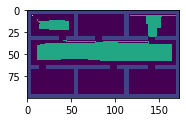

In [39]:
#start = [50,160]
#route1 = choose_route_look_ahead(a[0].roombox,testme,start,[goal_position])
map_arr_r = np.copy(map_arr)
map_arr_r[6,6] = 5

for pos in route2[1::]:
    map_arr_r[pos[0],pos[1]] = 3
    
plt.subplot(1,2,1)
plt.imshow(map_arr_r)


In [ ]:
fig= plt.subplots(figsize=(10,10))
fig = plt.imshow(map_arr_r)

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
fig = plt.imshow(testme)
result = np.zeros(map_arr.shape)
for i in range(0,map_arr.shape[0]):
    for j in range(0,map_arr.shape[1]):
        result[i,j] = int(testme[i][j])
        text = ax.text(j, i, result[i][j],
                       ha="center", va="center", color="w")

In [ ]:
zoomed[1][1]

In [ ]:
map_arr[20][20]

In [ ]:
map_arr[4,4]

In [ ]:
map_arr[29,53]

In [ ]:
room = np.copy(map_arr[4:30,4:54])

In [ ]:
room

In [ ]:
plt.imshow(world)

In [ ]:
map_arr = room

In [ ]:
world = np.pad(room, [(1, 1), (1, 1)], mode='constant', constant_values=1)

In [ ]:
world